# Contour

- curves that joins all continuous paths in a closed shape/ boundary. 
- we can draw this contour by using cv2.Canny(), cv2.threshold(), cv2.inRange()

In [15]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
image = cv2.imread("../images/shapes.jpg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

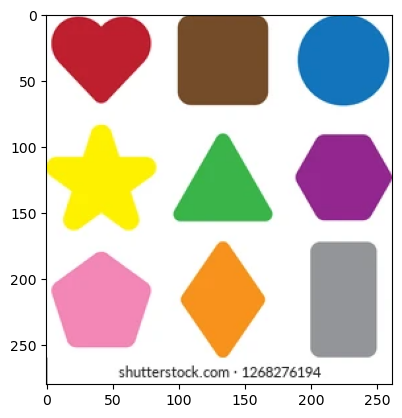

In [5]:
plt.imshow(image_rgb)

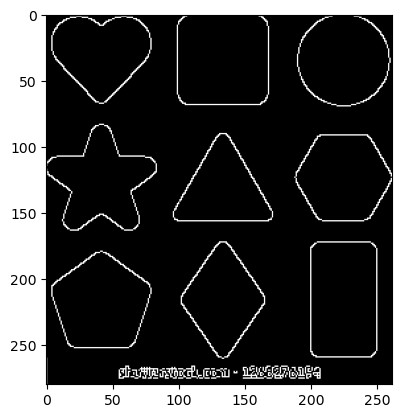

In [7]:
# Detecting the edges of shapes from image 
gray = cv2.Canny(image_gray, 50, 150)

plt.imshow(gray, cmap="grey")

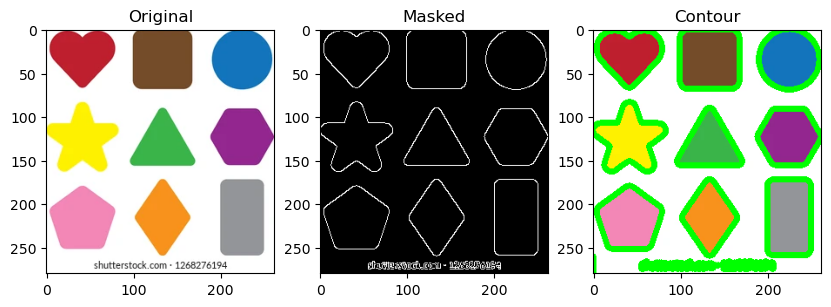

In [12]:
contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) 
# cv2.RETR_LIST (mode) -> retrieves all contours without any hierarchy; 
# cv2.CHAIN_APPROX_SIMPLE (method) -> contours points are stored 
contour_img = image.copy()
cv2.drawContours(contour_img, contours, -1, (0,255,0),5) # drawContours(img, function, -1 -> to draw all contours of detected objects,
# color, thickness)

plt.figure(figsize= (10,8))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(gray, cmap="grey")
plt.title("Masked")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title("Contour")

plt.show()

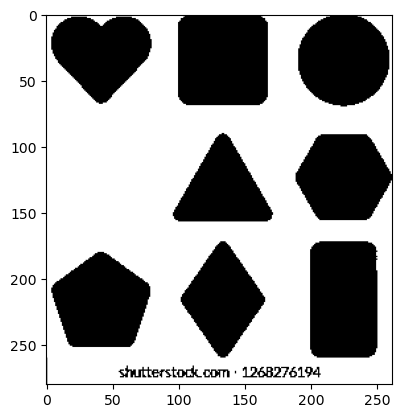

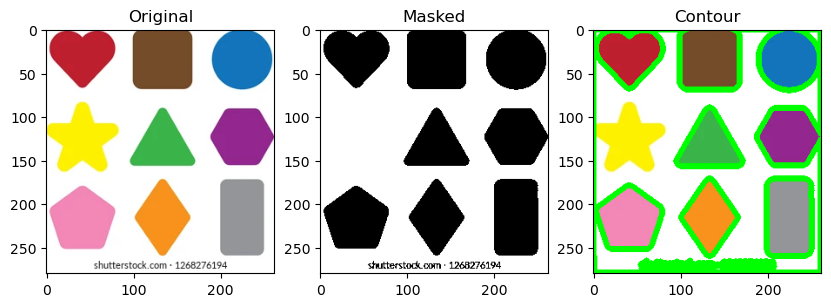

In [14]:
retval, binary = cv2.threshold(image_gray, 200, 255, cv2.THRESH_BINARY) # greater than 200 is 1, else 0 

plt.imshow(binary, cmap="grey")

contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) 
# cv2.RETR_LIST (mode) -> retrieves all contours without any hierarchy; 
# cv2.CHAIN_APPROX_SIMPLE (method) -> contours points are stored 
contour_img = image.copy()
cv2.drawContours(contour_img, contours, -1, (0,255,0),5) # drawContours(img, function, -1 -> to draw all contours of detected objects,
# color, thickness)

plt.figure(figsize= (10,8))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(binary, cmap="grey")
plt.title("Masked")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title("Contour")

plt.show()



# With color images

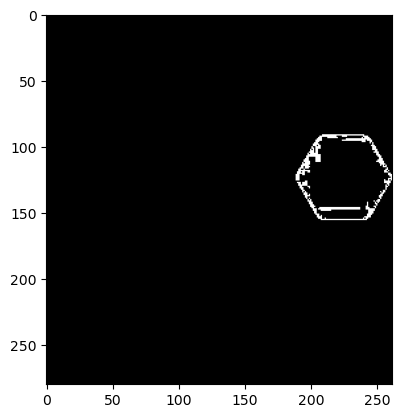

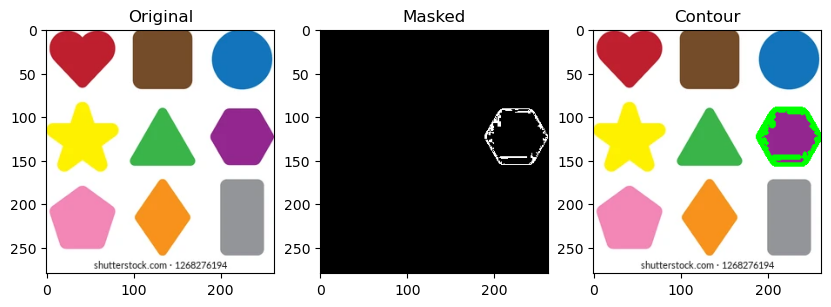

In [22]:
import numpy as np

lower_bound = np.array([120, 80, 0], dtype =np.uint8)
upper_bound = np.array([160, 185, 255], dtype =np.uint8)

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


mask = cv2.inRange(image_hsv, lower_bound, upper_bound)

plt.imshow(mask, cmap="grey")

contours, hierarchy = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) 
# cv2.RETR_LIST (mode) -> retrieves all contours without any hierarchy; 
# cv2.CHAIN_APPROX_SIMPLE (method) -> contours points are stored 
contour_img = image.copy()
cv2.drawContours(contour_img, contours, -1, (0,255,0),3) # drawContours(img, function, -1 -> to draw all contours of detected objects,
# color, thickness)

plt.figure(figsize= (10,8))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(mask, cmap="grey")
plt.title("Masked")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title("Contour")

plt.show()

## Using inRange() in grayscale image

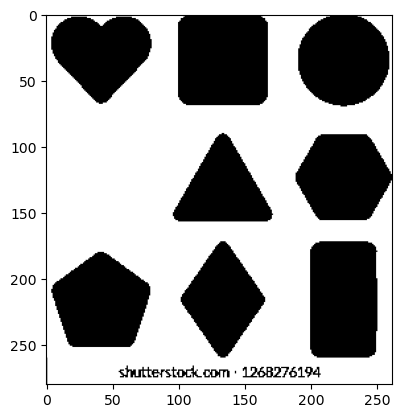

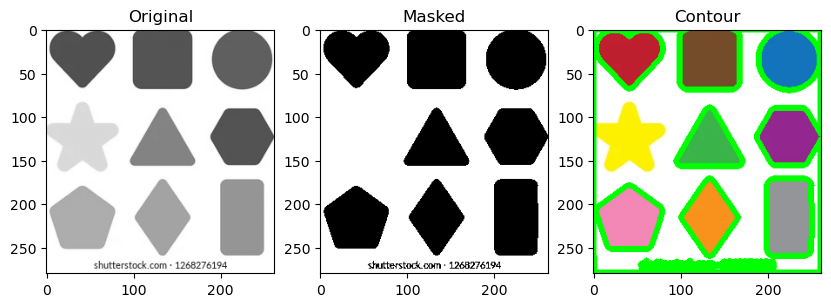

In [25]:
import numpy as np

lower_bound = np.array([200], dtype =np.uint8)
upper_bound = np.array([255], dtype =np.uint8)

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


mask = cv2.inRange(image_gray, lower_bound, upper_bound)

plt.imshow(mask, cmap="grey")

contours, hierarchy = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) 
# cv2.RETR_LIST (mode) -> retrieves all contours without any hierarchy; 
# cv2.CHAIN_APPROX_SIMPLE (method) -> contours points are stored 
contour_img = image.copy()
cv2.drawContours(contour_img, contours, -1, (0,255,0),5) # drawContours(img, function, -1 -> to draw all contours of detected objects,
# color, thickness)

plt.figure(figsize= (10,8))

plt.subplot(1,3,1)
plt.imshow(image_gray, cmap="grey")
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(mask, cmap="grey")
plt.title("Masked")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title("Contour")

plt.show()

## To remove the border of image

30


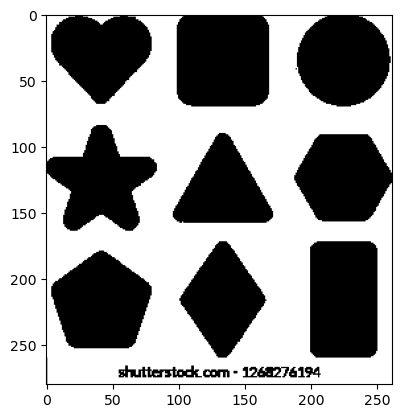

In [31]:
import numpy as np

lower_bound = np.array([245], dtype =np.uint8)
upper_bound = np.array([255], dtype =np.uint8)

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


mask = cv2.inRange(image_gray, lower_bound, upper_bound)

plt.imshow(mask, cmap="grey")

contours, hierarchy = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) 
# to remove the borders of the image
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True) # stores all in descending order 

print(len(sorted_contours))

contours = sorted_contours[1:10]


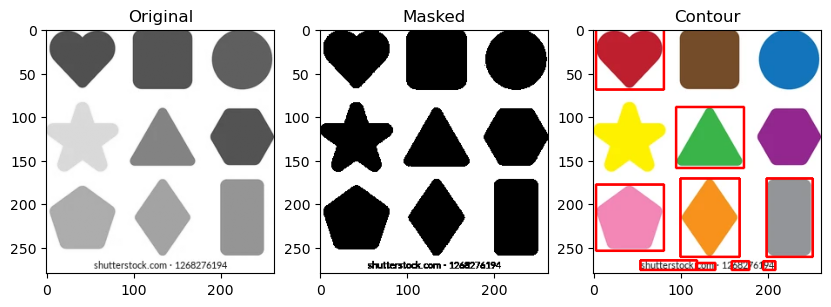

In [32]:

# cv2.RETR_LIST (mode) -> retrieves all contours without any hierarchy; 
# cv2.CHAIN_APPROX_SIMPLE (method) -> contours points are stored 
contour_img = image.copy()

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(contour_img, (x,y),(x+w, y+h), (0,0,255),2)

plt.figure(figsize= (10,8))

plt.subplot(1,3,1)
plt.imshow(image_gray, cmap="grey")
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(mask, cmap="grey")
plt.title("Masked")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title("Contour")

plt.show()